<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Data Preprocessing 101 

In this first exercise, we will go step by step through the data preparation steps. This guide is not fully comprehensive but it gives you a good understanding of what to do. The main goal is to teach you the `sklearn` syntax for some of the operations.

The skills you acquired with `NumPy` and with `Pandas` in the previous module will come handy here, as well as in the rest of the `machine learning` module!

## Dataset

We will be using the <span style="color:teal">**Todays's dataset:**</span><a href="https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india"> India air quality data, Kaggle</a>, the very same dataset we have seen in the lecture.

# Load the data 

Load the data `raw_data/India_air_quality.csv` into a new `Pandas.DataFrame` that you can call `data`:

In [2]:
# from nbta.utils import download_data
# download_data(id='1HtOHNoKtbqxsROzC0grJsXLR1CvM58xa')
rds = 42

In [3]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
import pandas as pd

data = pd.read_csv('raw_data/India_air_quality.csv')
data.describe()

,so2,no2,rspm,spm,pm2_5,rainfall
count,289069.000000,310031.000000,310031.000000,129953.000000,6520.000000,269701.000000
mean,11.163789,26.403134,108.075994,217.529277,40.644914,79.922297
std,11.134656,17.965159,73.249767,147.554093,30.825520,20.010910
min,0.000000,-66.400000,0.000000,0.000000,3.000000,-24.682525
25%,5.000000,14.500000,56.666667,111.000000,24.000000,66.406214
50%,8.220000,23.000000,90.000000,184.000000,32.000000,79.888426
75%,14.000000,33.000000,140.000000,289.000000,46.000000,93.456215
max,909.000000,876.000000,1156.000000,2610.000000,504.000000,167.928488


# 💻 <code>drop_duplicates</code>

Do the following:

1. Check how many duplicates are in the dataframe by chaining together the pandas functions `.duplicated()` and `.sum()` on the dataframe `data`. Save this value as a variable called `duplicates_count`
2. Remove the duplicates from the dataframe by calling the function `.drop_duplicates()` on `data`. NOTE: you need to reassign data to the return value to replace it (`data = data.drop_duplicates()`
3. Check that the duplicates have been removed by doing step 1 again


In [4]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

duplicates_count = data.duplicated().sum()
print('Number of duplicates before removing: {}'.format(duplicates_count))

data = data.drop_duplicates()

print('Number of duplicates after removing: {}'.format(data.duplicated().sum()))

Number of duplicates before removing: 400
Number of duplicates after removing: 0


# 💻 <code>train_test_split</code>

Do the following in this sections:
1. Import the `train_test_split` function from `sklearn.model_selection`
2. Create a `y` target series that contains `rspm`: this is what we will use as a label to our supervised training later, i.e. we will try to predict this property.
3. Create an `X` feature matrix (dataframe) that contains all columns except `rspm` (use `data.drop(columns="rspm")`) 
4. Create `X_train`, `y_train` (70% of the data) and a `X_test`, `y_test` (30% of the data) by using the `train_test_split` method
5. Use the `shape` attribute of your `X_train` to verify the number of samples (should be 216741) and features (should be 11) that you have in the train set

**hint 1:** When doing the `train_test_split`, you can set the `test_size` (or `train_size`) to the desired fraction
**hint 2:** You can also split directly two dataframe / matrix together, for instance, `train_test_split(X, y, ...)`. Keep in mind that this returns `X_train, X_test, y_train, y_test` (in this order!)

In [5]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.model_selection import train_test_split

y = data['rspm']
X = data.drop('rspm', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rds)

print(X_train.shape)
                    

(216741, 10)


### ☑️ Test your code

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicates_count,
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.48s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



# 💻 Exploratory Data Analysis (EDA)

Do the following in this sections:
1. Check the **data type** of your train set by looking at the `X_train.dtypes`
2. Use the `describe()` method on your `X_train` dataframe to find the various statistics on the numerical values
3. Find the frequency of the different locations by calling the `value_counts()` method on the `X_train.location` series
4. Plot a historgram of distribution of the `X_train.location` series
5. Plot the histograms of all the numerical features in your `X_train` (explore the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html">DataFrame.hist()</a> function)


stn_code     object
state        object
location     object
type         object
so2         float64
no2         float64
spm         float64
pm2_5       float64
date         object
rainfall    float64
dtype: object

                 so2            no2           spm        pm2_5       rainfall
count  202025.000000  216741.000000  90875.000000  4583.000000  188881.000000
mean       11.133270      26.389450    217.544524    40.501726      79.911407
std        11.093978      17.986456    147.514219    30.202104      20.036673
min         0.000000     -66.400000      0.000000     4.000000     -24.682525
25%         5.000000      14.400000    110.333333    24.000000      66.362289
50%         8.200000      23.000000    184.000000    32.000000      79.861002
75%        14.000000      33.000000    289.000000    46.000000      93.447692
max       909.000000     876.000000   2610.000000   395.000000     166.455104


array([[<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'spm'}>,
        <Axes: title={'center': 'pm2_5'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >]], dtype=object)

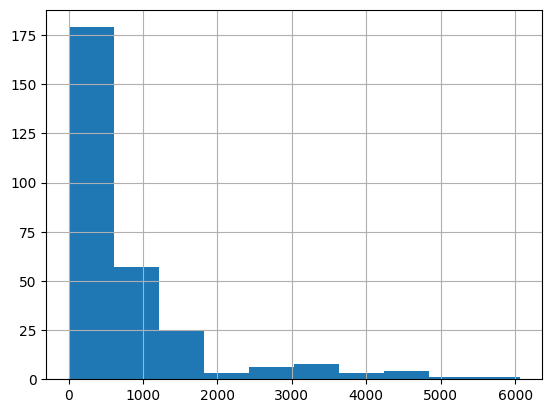

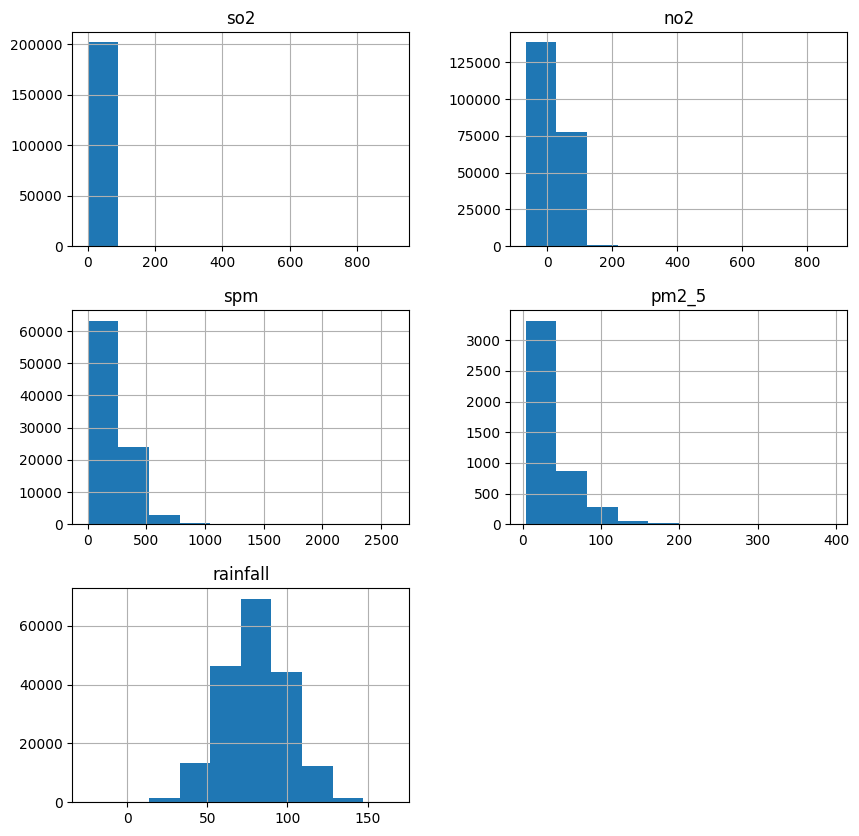

In [7]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

print(X_train.dtypes)
print()
print(X_train.describe())

# Plot a historgram of distribution of the `X_train.location` series
frequency = X_train.location.value_counts()
frequency.hist()

# Plot a historgram of distribution of all numerical features in the `X_train` series
X_train.hist(figsize=(10,10))


# ❓ Missing Data 

The goal of this step is to identify what data is missing in your `X_train`, and to remove columns with too many missing datapoints (in our case, we will use `>30% missing data` as our threshold to remove columns).

Do the following:
1. On your train set, call the function `.isnull()` and explore its output. What `dtype` is it? Do you understand what it does?
2. Now chain both `.isnull()` with `.sum()`: this will give you the number of missing data in each column! Why?
3. Let's sort this output to have the columns with the largest number of missing data at the top. Simply chain a new function, `sort_values()` to the two previous ones. You also need to pass the argument `ascending=False` to the function to have it in descending order.
4. This is great, but how do we know whether a column has more or less then 30% missing data? Simple! Devide the output of step 3 above by the lengths of the `X_train` dataframe (or the position 0 on it's `.shape` tuple)! Anything above 0.3 means >0.3% missing data.


In [8]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

print(X_train.isnull().sum().sort_values(ascending=False))
print()

for i, missing_count in enumerate(X_train.isnull().sum().sort_values(ascending=False)):
    if missing_count / len(X_train) > 0.3:
        print(i, missing_count)

pm2_5       212158
spm         125866
stn_code     74057
rainfall     27860
so2          14716
type           102
date             3
state            0
location         0
no2              0
dtype: int64

0 212158
1 125866
2 74057


## Handling missing data

Now you know what columns have more than 30% missing data. Let's handle them one by one:

### <code>pm2_5</code>

You should have learned from the exercise above that is >97% of data missing in this column. Simply drop the entire column by using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html">DataFrame.drop()</a> function.

⚠️ You either need to use the `inplace=True` argument or assign the return value of this function back to `X_train` for this change to be reflected in the original `X_train`.

Do the same for the other features (columns) with >30% missing data.

In [9]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

X_train = X_train.drop(['pm2_5', 'spm', 'stn_code'], axis=1)

print(X_train.isnull().sum().sort_values(ascending=False))

for i, missing_count in enumerate(X_train.isnull().sum().sort_values(ascending=False)):
    if missing_count / len(X_train) > 0.3:
        print(i, missing_count)

rainfall    27860
so2         14716
type          102
date            3
state           0
location        0
no2             0
dtype: int64


In [10]:
print(X_train.dtypes)

state        object
location     object
type         object
so2         float64
no2         float64
date         object
rainfall    float64
dtype: object


### <code>type</code>

Type also has missing values. However, we will treat these missing values differently here. To understand why, do the following:

1. Check the different categories and the number of instance of the `X_train.type` Series: you can see that there is a category named `Others`.
2. Use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">DataFrame.replace()</a> function to replace all of the missing values (`np.nan`) by `Others`. Make sure to reassign those values back to the `X_train` dataframe


🚨 Missing data does not necessarily mean no information!


In [11]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
import numpy as np

print(X_train)
X_train['type'] = X_train['type'].replace(np.nan, "Others")
print(X_train)


                 state     location         type   so2   no2        date  \
67566            Assam     Guwahati  Residential   6.0  13.0  05/01/2015   
295410     Maharashtra        Latur  Residential   5.0  16.0  18/10/2011   
118557     Maharashtra  Navi Mumbai  Residential  12.0  44.0  05/10/2011   
227449      Tamil Nadu      Madurai       Others  16.6  25.2  22/05/2006   
180266       Karnataka       Hassan  Residential   5.0  18.0  06/08/2012   
...                ...          ...          ...   ...   ...         ...   
119927   Uttar Pradesh       Jhansi       Others   8.8  28.5  27/03/2009   
259456     West Bengal     Durgapur   Industrial   NaN  44.1  06/08/2004   
131993  Andhra Pradesh    Hyderabad  Residential   5.0  22.0  23/02/2012   
146945  Andhra Pradesh       Guntur  Residential   5.0  16.0  09/12/2013   
122007         Gujarat     Vadodara       Others   8.1  16.3  20/10/2006   

          rainfall  
67566    92.268021  
295410         NaN  
118557         NaN  
227

# Imputing missing data with Sklearn's <code>SimpleImputer</code>

We have now dropped all of the features (columns) with too many missing data. We are now going to use the Sklearn <code>SimpleImputer()</code> class: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">make sure to look at the documentation first!</a> Looking at the documentation for classes and function is one of the best way to learn to code efficiently in machine learning.

The second way it to use <a href="https://stackoverflow.com/">Stack Overflow</a> to look for issues you are facing in your code: more often then not, someone has had the same problem and a good solution (with a green tick) is posted. Try to use these sources of information first before calling the teaching assistant for help: it is important to learn to troubleshoot your own problems first.

Remember from the class that we will use the `fit()` function on our imputer class to learn the statistics from our `X_train`, and then use the `transform()` function to change our data!


## Numerical data

Often, when you apply transformation to your data you will want to treat your numerical data differently than you categorical data. For instance, replacing a missing numerical value by the `mean()` of a column makes perfect sense. But this would not make sense for a categorical value (what is the `mean` of the `location` column?)

So, we need to do the following:

1. Identify the `numerical` columns: you can do this by calling the `select_dtypes()` function on the `X_train` dataframe, and passing the argument `include=np.number` to this function. This will return a dataframe containing only numerical columns! If you call `.columns` on it, you will obtain an array of column names. I suggest you store this in a variable named `num_cols` as it will be useful in later steps.
2. Import the `SimpleImputer` class from `sklearn.impute`
3. Create `num_imputer` instance with the "mean" as its strategy: `num_imputer = SimpleImputer(strategy="mean")`
4. Fit your new imputer on the `num_cols` of `train_test`
5. You can check the statistics (in this case, the means) of each columns by calling the `.statistics_` property of the `num_imputer`
6. Now replace the original numerical columns in `X_train` by the imputed ones, using the `transform` method of your `num_imputer`

**hint** for this last step, you can write code that looks like `X_train[num_col] = ...`

In [12]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.impute import SimpleImputer

num_cols = X_train.select_dtypes(include=np.number).columns
print(num_cols)

num_imputer = SimpleImputer(strategy='mean')
num_imputer.fit(X_train[num_cols])
print(num_imputer.statistics_)
X_train[num_cols] = num_imputer.transform(X_train[num_cols])
print(X_train[num_cols].isnull().sum())
print()
print(X_train[num_cols].describe())

Index(['so2', 'no2', 'rainfall'], dtype='object')
[11.1332703  26.38944951 79.91140748]
so2         0
no2         0
rainfall    0
dtype: int64

                 so2            no2       rainfall
count  216741.000000  216741.000000  216741.000000
mean       11.133270      26.389450      79.911407
std        10.710735      17.986456      18.704628
min         0.000000     -66.400000     -24.682525
25%         5.000000      14.400000      68.668771
50%         9.000000      23.000000      79.911407
75%        13.550000      33.000000      91.181084
max       909.000000     876.000000     166.455104


### Categorical data

For the categorical data, you can follow a very similar approach as above:
1. Find all of the categorical columns (`cat_cols`), this time using `exclude=np.number` in step 1 from the numerical transformation
2. Create a new instance of the `SimpleImputer` class, call it `cat_imputer`, with the `"most_frequent"` strategy.
3. Apply this new imputer to all categorical columns in a similar way as you did above for numerical columns.

In [13]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

# cat_cols = X_train.select_dtypes(include=np.object).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns
print(cat_cols)
print()

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[cat_cols])
print(cat_imputer.statistics_)
print()
X_train[cat_cols] = cat_imputer.transform(X_train[cat_cols])
print(X_train[cat_cols].isnull().sum())
print()
print(X_train[cat_cols].describe())

Index(['state', 'location', 'type', 'date'], dtype='object')

['Maharashtra' 'Nagpur' 'Residential' '06/06/2013']

state       0
location    0
type        0
date        0
dtype: int64

              state location         type        date
count        216741   216741       216741      216741
unique           34      287            4        4647
top     Maharashtra   Nagpur  Residential  06/06/2013
freq          49847     6060        91352         128


### ☑️ Test your code

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



# Outliers 

We will take a simple approach to outliers here: we will consider that negative values are not possible given that we are looking at concentration of chemicals in the atmosphere. So, we will remove all negative values.

Do the following:

1. Find the minimum values of all `num_cols` columns (i.e. your numerical columns)
2. Drop the rows where any of the `num_cols` are less than zero. Check the `DataFrame.drop()` function documentation to see how to do this 

**hint**: You may want to find the `index` of the rows where the features you want to remove are < zero, and then pay attention to the `index` parameter of the `drop()` function!

In [15]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

print(X_train[num_cols].describe())
print()
print(X_train[num_cols].min())

# find outliers in X_train[num_cols], that are negative values and drop them
# X_train[num_cols] = X_train[num_cols].where(X_train[num_cols] > 0)

rows_to_remove = X_train[X_train[num_cols] < 0].any(axis=1)

X_train.drop(X_train[rows_to_remove].index, inplace=True)


                 so2            no2       rainfall
count  216741.000000  216741.000000  216741.000000
mean       11.133270      26.389450      79.911407
std        10.710735      17.986456      18.704628
min         0.000000     -66.400000     -24.682525
25%         5.000000      14.400000      68.668771
50%         9.000000      23.000000      79.911407
75%        13.550000      33.000000      91.181084
max       909.000000     876.000000     166.455104

so2          0.000000
no2        -66.400000
rainfall   -24.682525
dtype: float64


In [16]:
X_train.describe()

,so2,no2,rainfall
count,216734.000000,216734.000000,216734.000000
mean,11.133193,26.390359,79.913160
std,10.710696,17.984506,18.699964
min,0.000000,0.000000,0.497750
25%,5.000000,14.400000,68.669743
50%,9.000000,23.000000,79.911407
75%,13.538333,33.000000,91.181017
max,909.000000,876.000000,166.455104


# Feature Engineering

Here, we are going to do some feature engineering on `so2` and `no2`. But first, plot the histogram of these two features and see what you observe:


<Axes: >

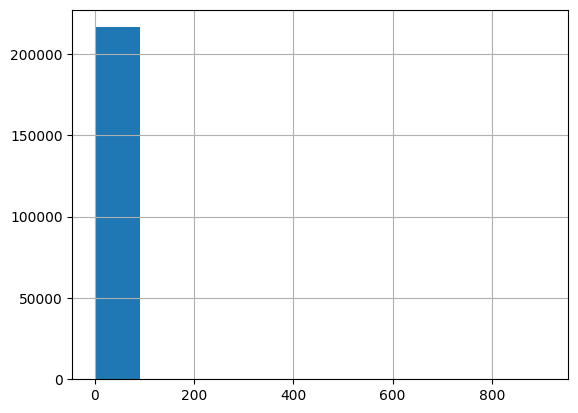

In [17]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

X_train['so2'].hist()

<Axes: >

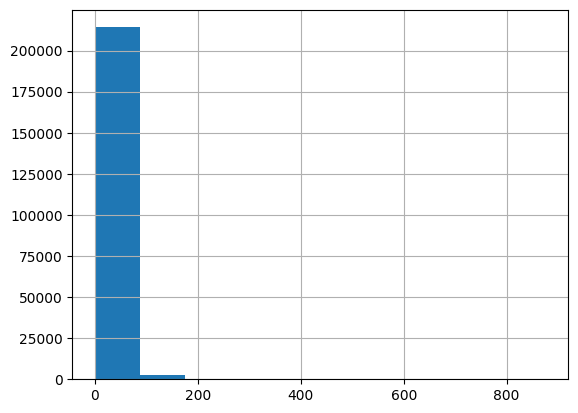

In [18]:
X_train['no2'].hist()

## Transforming the two features to a log scale

We are going to transform these two features into a logarithmic scale, because this will distribute our data better. Taking the log of a value is a very common data engineering trick that can sometime help improve the signal-to-noise ratio of your dataset.

Do the following:

1. For both `so2` and `no2` replace the original value by their log. Use `np.log`, and to avoid numerical error, add a small number (`0.001`) to the original values (because the log of 0 is not a number)
2. Draw the histograms again: did they improve?

<Axes: >

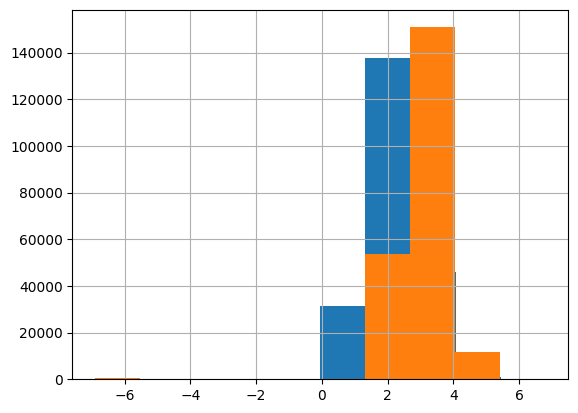

In [19]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

X_train['so2'] = np.log(X_train['so2'].astype(float) + 0.001)
X_train['no2'] = np.log(X_train['no2'].astype(float) + 0.001)

X_train['so2'].hist()
X_train['no2'].hist()

In [20]:
print(X_train['so2'].describe())
print()
print(X_train['no2'].describe())

count    216734.000000
mean          2.100593
std           0.867353
min          -6.907755
25%           1.609638
50%           2.197336
75%           2.605599
max           6.812346
Name: so2, dtype: float64

count    216734.000000
mean          3.065787
std           0.757240
min          -6.907755
25%           2.667298
50%           3.135538
75%           3.496538
max           6.775367
Name: no2, dtype: float64


# Feature Scaling

We are now ready to scale our numerical features! Import the `StandardScaler` class from `sklearn.preprocessing`. Remember, this is a `scikit-learn Transformer` so you already know how to use this type of object (if you forgot, go back to the `SimpleImputer` and study what you did with it.

Do the following:
1. Import the `StandardScaler`
2. Create an instance of `StandardScaler` called `scaler`
3. Fit the `scaler` to your numerical data, and replace the numerical columns in your `X_train` by their scaled versions!

**hint**: If in doubt, read the doc! And again, even though this is a new class, you will use it in a very similar way as the `SimpleImputer` (but of course without the need to use the `strategy` argument)

In [21]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=np.number).columns
print(num_cols)
print()

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
print(scaler.mean_)
print()

X_train[num_cols] = scaler.transform(X_train[num_cols])
print(X_train[num_cols].describe())

Index(['so2', 'no2', 'rainfall'], dtype='object')

[ 2.10059292  3.06578664 79.91315998]

                so2           no2      rainfall
count  2.167340e+05  2.167340e+05  2.167340e+05
mean  -4.289798e-16  7.978992e-16  7.245612e-16
std    1.000002e+00  1.000002e+00  1.000002e+00
min   -1.038605e+01 -1.317094e+01 -4.246831e+00
25%   -5.660398e-01 -5.262399e-01 -6.012548e-01
50%    1.115382e-01  9.211243e-02 -9.371706e-05
75%    5.822398e-01  5.688450e-01  6.025617e-01
max    5.432351e+00  4.898829e+00  4.627931e+00


### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 2 items

test_scaling.py::TestScaling::test_no2 PASSED                            [ 50%]
test_scaling.py::TestScaling::test_so2 PASSED                            [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



# Encoding

Our numerical features are all ready now. We still want to use some of our categorical features, notably the `state` column. But to do this, we first need to encode it using the `OneHotEncoder` class.

Do the following:

1. From `sklearn.preprocessing` import the `OneHotEncoder` class
2. Create a new instance of the `OneHotEncoder` class, call it `ohe`. Make sure to pass the argument `sparse_output=False` when you create the encoder!
3. Fit the `ohe` to the `X_train[["state"]]` feature
4. We want to capture the column names in the `ohe`. Create a variable with this code: `encoded_columns = ohe.categories_[0]`. Read the doc to understand what this does!
5. Create a new array called `state_encoded` by using `ohe.transform(X_train[["state"]])`
6. Only keep the numerical columns of `X_train`, for instance, by doing `X_train = X_train[num_cols]`
7. Now add the new One-hot-encoded columns to `X_train` by doing `X_train[encoded_columns] = state_encoded`
8. Check how your new `X_train` dataframe looks, and check its size: you should see (216735, 36)

In [23]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_train[['state']])
print(ohe.categories_)
print()

encoded_columns = ohe.categories_[0]
print(encoded_columns)
print()

state_encoded = ohe.transform(X_train[['state']])
print(state_encoded)
print()

num_cols = X_train.select_dtypes(include=np.number).columns
X_train = X_train[num_cols]
X_train[encoded_columns] = state_encoded

print(X_train)
print(X_train.shape)

[array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)]

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal']

[[0. 0. 1. ... 0. 0. 

/var/folders/l2/tk6kq1hx5n3dqpdvrw1c3jwr0000gn/T/ipykernel_25513/1933178199.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[encoded_columns] = state_encoded
/var/folders/l2/tk6kq1hx5n3dqpdvrw1c3jwr0000gn/T/ipykernel_25513/1933178199.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[encoded_columns] = state_encoded
/var/folders/l2/tk6kq1hx5n3dqpdvrw1c3jwr0000gn/T/ipykernel_25513/1933178199.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

### ☑️ Test your code

In [24]:
from nbresult import ChallengeResult

max_values = [X_train[feature].max() for feature in ['Assam','Bihar', 'Chandigarh', 'Chhattisgarh']]
nb_ohe = X_train.drop(columns=['so2','no2','rainfall']).columns.shape[0]

result = ChallengeResult('encoding',
                         nb_columns = len(X_train.columns),
                         max_values = max_values,
                         nb_ohe = nb_ohe
                         
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 3 items

test_encoding.py::TestEncoding::test_columns PASSED                      [ 33%]
test_encoding.py::TestEncoding::test_max_values PASSED                   [ 66%]
test_encoding.py::TestEncoding::test_number_of_features PASSED           [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



# Preparing our `y_train`

## Droping samples
When we prepared our `X_train` above, we ended up droping rows because some were duplicated, or outliers. If you test the `shape` of our `y_train` and compare it to the shape of the `X_train`, you will notice that we have different number of samples. This will be a problem soon, when we try to model.

Luckily, we can use the index values of the `X_train` to only keep the `y_train` that are relevant to us!

Do the following:

1. create a new variable, `idx`, which is equal to the `index` of the `X_train` dataset
2. Reassign `y_train` to only contain the values with the same index as `X_train`: `y_train = y_train[idx]`
3. If you check the `shape` of your `y_train`, it should be now (216735,)

In [25]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

print(X_train.shape)
print(y_train.shape)
print()

idx = X_train.index
y_train = y_train[idx]

print(X_train.shape)
print(y_train.shape)

(216734, 37)
(216741,)

(216734, 37)
(216734,)


### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('y_cat',
                         dataset = y_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_y_cat.py::TestY_cat::test_number_cat PASSED                         [100%]

============================== 1 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/y_cat.pickle

git commit -m 'Completed y_cat step'

git push origin master



# Modelling

Now comes the fun bit! We are going to try to predict the levell of pollution (`y_train_cat`) based on our features (`X_train`). We will also use cross validation to see which model performs better.

Do the following:
1. Import `LinearRegression` from `sklearn.linear_model` as well as `cross_validate` from `sklearn.model_selection`
2. Create a new instance of `LinearRegression`, call it `lr_model`. 
3. Cross validate (`cv=5`, `scoring='neg_mean_squared_error'`) your logistic regression model: make sure to capture the output of the function in a variable (`lr_cv`)
4. `lr_cv` should be a Python dictionary containing `fit_time`, `score_time`, and `test_score`. Calculate the mean test score as the `root mean squared error` for this linear regression.

In [27]:
X_train

,so2,no2,rainfall,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,Uttaranchal,West Bengal
67566,-0.355873,-0.661298,0.660691,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295410,-0.566040,-0.387111,-0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118557,0.443185,0.948745,-0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227449,0.817282,0.212743,-1.093307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
180266,-0.566040,-0.231577,-0.256227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119927,0.085631,0.375249,0.322764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
259456,0.356759,0.951742,0.616512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131993,-0.566040,0.033413,1.545098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146945,-0.566040,-0.387111,-0.243921,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr_model = LinearRegression()
lr_cv = cross_validate(lr_model, X_train, y_train, cv=5,
                        scoring='neg_mean_squared_error')
lr_cv_rm = np.sqrt(-lr_cv['test_score'])

print(lr_cv)
print(lr_cv_rm, type(lr_cv_rm))

{'fit_time': array([0.19983602, 0.19476819, 0.22181988, 0.17901707, 0.14758492]), 'score_time': array([0.00505495, 0.03958297, 0.00799227, 0.00396371, 0.0132761 ]), 'test_score': array([-3.73741216e+03, -1.44424589e+21, -3.69420428e+03, -3.76995681e+03,
       -3.72518947e+03])}
[6.11343779e+01 3.80032352e+10 6.07799661e+01 6.13999740e+01
 6.10343302e+01] <class 'numpy.ndarray'>


### How good is your score?
Is your score decent? Why do you think that is?
<details><summary>Answer</summary> This is a terrible score of course: the root mean square error is magnitudes larger than what we are trying to predict. But why? This has to do in part with the fact that we now have a lot of columns that determines where the measurement was taken. This does not help in the prediction, and add noise. We will see this week that having the right number of features (and features with high predictive power) is key. Another possible explanation is that the relationship between our `y` and our `X` is not linear, and thus a linear model such as ours will not work well.</details>

## Modelling attempt 2

Now do exactly the same process as above, but instead of modelling with the entire `X_train`, only use the features `so2`, `no2`, and `rainfall`.

Is your new `lr_cv` score a good score? Save your answer as either `True` or `False` (boolean) in a variable called `is_good_score`:

In [32]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

lr_model_2 = LinearRegression()
X_train_new = X_train[['so2', 'no2', 'rainfall']]
lr_cv = cross_validate(lr_model_2, X_train_new, y_train, cv=5,
                          scoring='neg_mean_squared_error')

print(lr_cv)
print(lr_cv['test_score'])


{'fit_time': array([0.01464915, 0.0134573 , 0.0111661 , 0.00945187, 0.00970483]), 'score_time': array([0.00125694, 0.00126004, 0.00104809, 0.00255609, 0.00209212]), 'test_score': array([-4755.86997745, -4660.44675219, -4692.27091124, -4803.61005725,
       -4783.09032382])}
[-4755.86997745 -4660.44675219 -4692.27091124 -4803.61005725
 -4783.09032382]


# Assessing your score

Is your `lr_cv` score a good score? Save your answer as either `True` or `False` (boolean) in the code below:

In [35]:
is_good_score = False

<details><summary>Answer</summary> Yes, the score is now within the same order of magnitude as our `y`. So this is a good improvement. However, looking critically at it, we can see that the mean error is about 80% of the data itself. So our error is still large. This means that our target variables are not predictive enough for the task.</details>

### ☑️ Test your code

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('cross_validate',
                         cv_lr = lr_cv,
                         is_good = is_good_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-3.5.0
collecting ... collected 2 items

test_cross_validate.py::TestCross_validate::test_cv_score PASSED         [ 50%]
test_cross_validate.py::TestCross_validate::test_is_good_score PASSED    [100%]

============================== 2 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/cross_validate.pickle

git commit -m 'Completed cross_validate step'

git push origin master



# 🏁 Finished!

Well done! Indeed, this was a terrible score. But the goal of this exercise was to make you familiar with the process, not necessarily to gain the best predictive model. We will be able to do this in subsequent exercises.<br> 
<span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.